# --- Data Cleaning & Preparation ---

In [24]:
# Import required libraries
import pandas as pd
import numpy as np

In [25]:
# Load the uploaded CSV file
file_path_input = "myntra_products.csv"
df_input = pd.read_csv(file_path_input)

In [26]:
# Step 1: Remove duplicates
df_input.drop_duplicates(inplace=True)

In [27]:
# Step 2: Handle missing values (replace with NaN)
df_input.replace(["", "NA", "N/A", None], np.nan, inplace=True)

In [28]:
# Step 3: Convert Price, MRP, and Rating to numeric 
for col in ["Price", "MRP", "Rating"]:
    if col in df_input.columns:
        df_input[col] = pd.to_numeric(df_input[col], errors="coerce")

In [29]:
# Step 4: Standardize Brand names 
if "Brand" in df_input.columns:
    df_input["Brand"] = df_input["Brand"].astype(str).str.strip().str.title()

In [30]:
# Step 5: Save cleaned data to CSV
output_path = "cleaned_myntra_products.csv"
df_input.to_csv(output_path, index=False)

In [31]:
# Display the cleaned DataFrame 
df_input.head(), df_input.shape

(     Brand                                       Product_Name   Price     MRP  \
 0  Sangria  Black Floral Printed V-Neck Thread Work Pure C...   650.0  2099.0   
 1  Parthvi  Floral Printed V-Neck Pure Cotton Pleated A-Li...   719.0  4799.0   
 2  Vishudh   Women Regular Kurta with Trousers & With Dupatta  1303.0  3949.0   
 3  Kimayra  Floral Printed Anarkali Pure Cotton Kurta With...  1399.0  3599.0   
 4  Parthvi  V-Neck Floral Printed Panelled Pure Cotton Ana...   671.0  4799.0   
 
    Rating  Reviews        Category  \
 0     4.2      2.0  Women Clothing   
 1     4.1    343.0  Women Clothing   
 2     4.3     29.0  Women Clothing   
 3     4.3      2.0  Women Clothing   
 4     4.1      1.0  Women Clothing   
 
                                                  URL  
 0  https://www.myntra.com/kurtas/sangria/sangria-...  
 1  https://www.myntra.com/kurta-sets/parthvi/part...  
 2  https://www.myntra.com/kurta-sets/vishudh/vish...  
 3  https://www.myntra.com/kurta-sets/kimayra/

# --- Data Analysis ---

In [32]:
# 1. Descriptive statistics for Price and Rating
desc_stats = df_input[["Price", "Rating"]].agg(["mean", "median", "min", "max"])
print("📊 Descriptive Statistics:\n", desc_stats, "\n")

📊 Descriptive Statistics:
               Price    Rating
mean    1214.144959  3.995956
median  1099.000000  4.100000
min      239.000000  1.700000
max     6900.000000  5.000000 



In [33]:
# 2. Brand analysis: Top 5 brands by number of products
top_brands = df_input["Brand"].value_counts().head(5)
print("🏷️ Top 5 Brands by Number of Products:\n", top_brands, "\n")

🏷️ Top 5 Brands by Number of Products:
 Sangria     243
Anouk       224
Kalini      223
Vishudh     198
Indo Era    193
Name: Brand, dtype: int64 



In [34]:
# 3. Discount analysis: which brands give highest average discount
df_input["Discount_Percent"] = ((df_input["MRP"] - df_input["Price"]) / df_input["MRP"]) * 100
brand_discount = df_input.groupby("Brand")["Discount_Percent"].mean().sort_values(ascending=False).head(5)
print("💰 Brands with Highest Average Discount:\n", brand_discount, "\n")

💰 Brands with Highest Average Discount:
 Brand
Vasvi             89.022256
Navlik            85.010001
Parthvi           84.625075
Subagi Fashion    84.028009
Raaka             84.016803
Name: Discount_Percent, dtype: float64 



In [35]:
# 4. Category-specific insights: Pricing & ratings grouped by Category
category_insights = df_input.groupby("Category").agg(
    Avg_Price=("Price", "mean"),
    Min_Price=("Price", "min"),
    Max_Price=("Price", "max"),
    Avg_Rating=("Rating", "mean"),
    Product_Count=("Product_Name", "count")
)
print("📂 Category Insights:\n", category_insights, "\n")

📂 Category Insights:
                   Avg_Price  Min_Price  Max_Price  Avg_Rating  Product_Count
Category                                                                    
Women Clothing  1214.144959      239.0     6900.0    3.995956           2311 



# --- Data Visualization ---

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure discount column exists
if "Discount_Percent" not in df_input.columns:
    df_input["Discount_Percent"] = ((df_input["MRP"] - df_input["Price"]) / df_input["MRP"]) * 100

# Set style
sns.set(style="whitegrid", palette="muted")

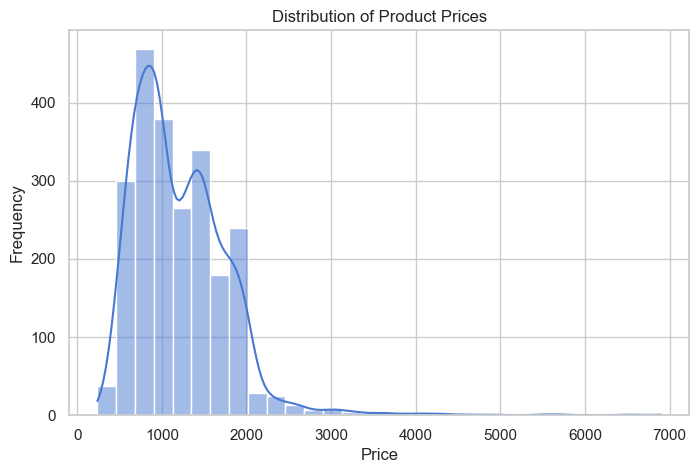

In [37]:
# 1. Histogram – Distribution of product prices
plt.figure(figsize=(8,5))
sns.histplot(df_input["Price"], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

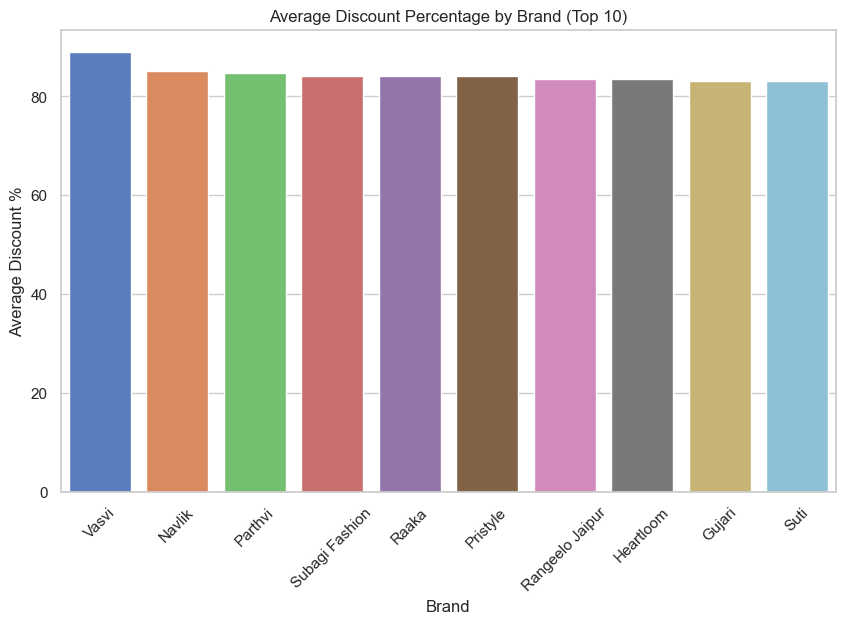

In [38]:
# 2. Bar chart – Average discount percentage by brand (Top 10 brands)
avg_discount = df_input.groupby("Brand")["Discount_Percent"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_discount.index, y=avg_discount.values)
plt.title("Average Discount Percentage by Brand (Top 10)")
plt.ylabel("Average Discount %")
plt.xticks(rotation=45)
plt.show()

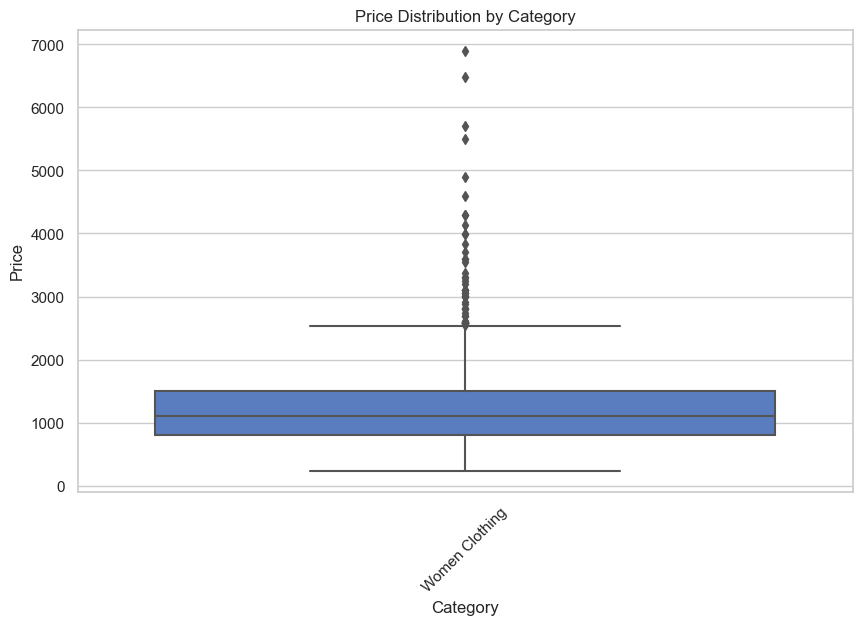

In [39]:
# 3. Box plot – Price distribution across categories
plt.figure(figsize=(10,6))
sns.boxplot(data=df_input, x="Category", y="Price")
plt.title("Price Distribution by Category")
plt.xticks(rotation=45)
plt.show()


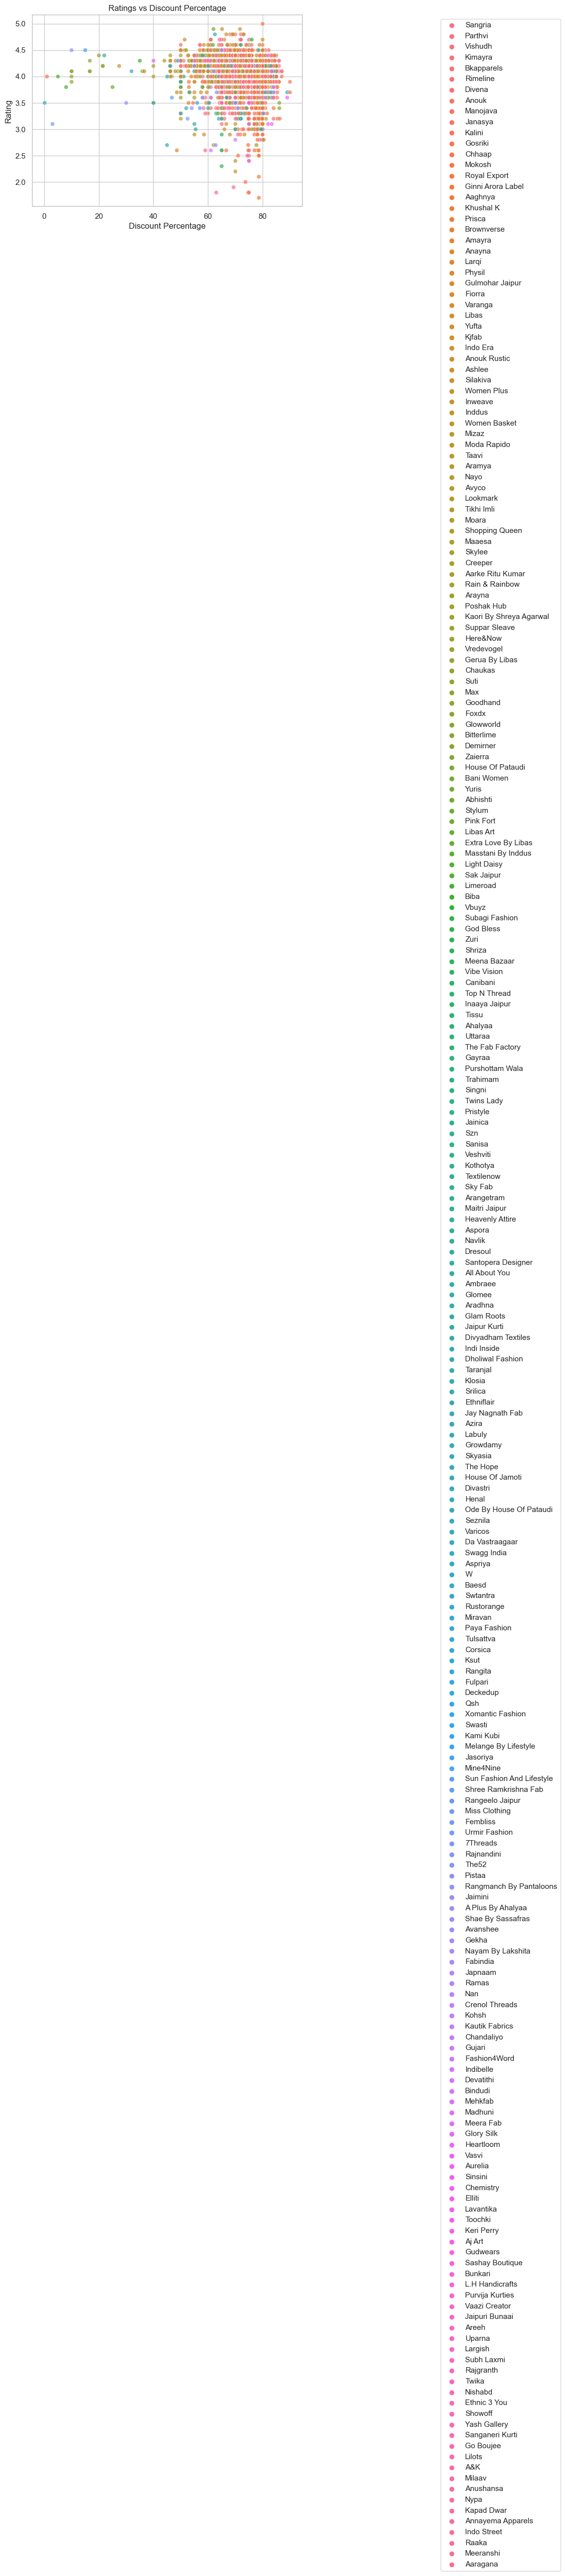

In [45]:
# 4. Scatter plot – Ratings vs Discount Percentage
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_input, x="Discount_Percent", y="Rating", hue="Brand", alpha=0.7)
plt.title("Ratings vs Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper left")
plt.show()